## Load data

In [2]:
import pandas as pd

In [11]:
df = pd.read_csv("merged.csv", engine='python')

In [15]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)

In [ ]:
df.head

In [6]:
df.shape

(18724238, 8)

In [19]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'location', 'followers',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'times', 'sentiment'],
      dtype='object')

NaNs already dropped

In [40]:
df.text

0           ⚡The Ukrainian Air Force would like to address...
1           JUST IN: #Anonymous has hacked &amp; released ...
2           ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...
3           &amp;quot;How we were waiting for you!&amp;quo...
4           India's purchase of discounted #Russian crude ...
                                  ...                        
12786431    I'll be joining @Lawrence tonight on @TheLastW...
12786432    We’ve lost already thousands of people killed,...
12786433    ⚡The Ukrainian Air Force would like to address...
12786434    Amb. William Taylor, former U.S. Ambassador to...
12786435    #MARIUPOL—However, even at #Ilyich, #Ukraine|i...
Name: text, Length: 12786436, dtype: object

## Exploratory data analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.set_style("darkgrid")

### Most used language

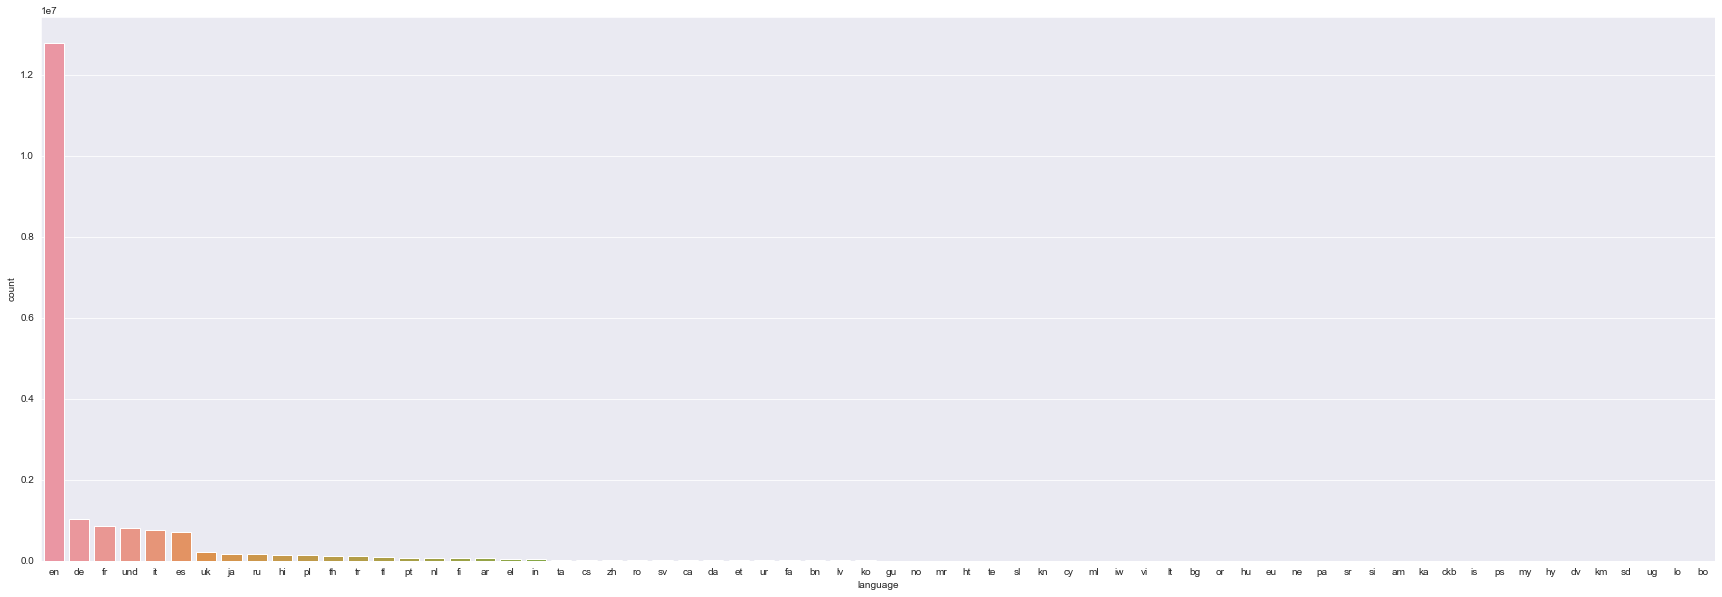

In [10]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(x=df['language'], data=df, order = df['language'].value_counts().index)

### Remove grammys hashtags

In [68]:
df = df.drop(df[df.hashtags == '[]'].index)
df = df.drop(df[df.hashtags == '[{\'text\': \'oscars\', \'indices\': [69, 76]}]'].index)
df = df.drop(df[df.hashtags == '[{\'text\': \'오늘의방탄\', \'indices\': [17, 23]}, {\'text\': \'BTS\', \'indices\': [25, 29]}, {\'text\': \'GRAMMYs\', \'indices\': [33, 41]}]'].index)
df = df.drop(df[df.hashtags == '[{\'text\': \'GRAMMYs\', \'indices\': [45, 53]}, {\'text\': \'BTS\', \'indices\': [121, 125]}, {\'text\': \'방탄소년단\', \'indices\': [126, 132]}]'].index)
df = df.drop(df[df.hashtags == '[{\'text\': \'GRAMMYs\', \'indices\': [71, 79]}, {\'text\': \'BTS\', \'indices\': [132, 136]}]'].index)
df = df.drop(df[df.hashtags == '[{\'text\': \'BTS\', \'indices\': [36, 40]}, {\'text\': \'GRAMMYS\', \'indices\': [68, 76]}]'].index)
df = df.drop(df[df.hashtags == "[{'text': 'Grammys', 'indices': [36, 44]}]"].index)



### Get 5 most retweeted unique posts

In [102]:
sorted_tweets = df[['text','retweetcount']].sort_values(by='retweetcount', ascending=False)

In [104]:
sorted_tweets[['text', 'retweetcount']].value_counts().tail(5)

text                                                                                                                                                                                                                                                                                                               retweetcount
BREAKING: @JustinTrudeau risks life and limb by traveling to #Ukraine and walking around outdoors without the protection of an N95 facemask.\n\n👇🏻 https://t.co/t3RRCdnKNP                                                                                                                                         145             1
                                                                                                                                                                                                                                                                                                                   108             1
                              

## Pick en

In [ ]:
df = df.loc[df['language'] == 'en']

In [13]:
df.to_csv('en.csv')

## Processs time

In [6]:
from datetime import datetime as dt

In [3]:
df = pd.read_csv('en.csv')

In [4]:
df.shape

(12786436, 9)

In [5]:
df['tweetcreatedts']

0           2022-04-01 00:00:00
1           2022-04-01 00:00:00
2           2022-04-01 00:00:00
3           2022-04-01 00:00:00
4           2022-04-01 00:00:00
                   ...         
12786431    2022-03-31 23:43:10
12786432    2022-03-31 23:43:10
12786433    2022-03-31 23:43:11
12786434    2022-03-31 23:43:11
12786435    2022-03-31 23:43:12
Name: tweetcreatedts, Length: 12786436, dtype: object

In [10]:
df['times'] = pd.to_datetime(df['tweetcreatedts']).dt.date

In [11]:
df['times']

0           2022-04-01
1           2022-04-01
2           2022-04-01
3           2022-04-01
4           2022-04-01
               ...    
12786431    2022-03-31
12786432    2022-03-31
12786433    2022-03-31
12786434    2022-03-31
12786435    2022-03-31
Name: times, Length: 12786436, dtype: object

In [22]:
df.columns

Index(['location', 'followers', 'tweetcreatedts', 'retweetcount', 'text',
       'hashtags', 'language', 'times', 'sentiment'],
      dtype='object')

In [23]:
df.to_csv('times.csv',index=False)

## Sentiment analysis

In [4]:
df = pd.read_csv('times.csv')

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import re
import ssl


In [5]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [6]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nandrusiak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nandrusiak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
sia = SIA()

In [8]:
def get_sentiment(text):

    text = re.sub(r'http\S+', '', text)      # remove links
    text = re.sub("@[A-Za-z0-9_]+","", text) # remove mentions
    text = re.sub("#[A-Za-z0-9_]+","", text) # remove hashtags

    scores = sia.polarity_scores(text)

    return scores['compound']

In [9]:
get_sentiment("i love happiness")

0.8316

In [10]:
get_sentiment("i hate sadness")

-0.765

In [11]:
df['sentiment'] = df['text'].map(get_sentiment)

In [24]:
df.to_csv('sentiments.csv')

## Refine tweet locations

In [8]:
df = pd.read_csv('countries.csv')

In [9]:
df['country'] = df['country'].replace(['United States', 'România', 'Україна', 'Россия', 'España', 'Deutschland', '中国', 'Polska','日本','Éire / Ireland','Ελλάς'], 
                                    ['United States of America', 'Romania', 'Ukraine', 'Russia', 'Spain', 'Germany','China','Poland','Japan','Ireland','Greece'])

df['country'] = df['country'].replace(['Pilipinas / Philippines','ایران','대한민국','México','Eesti','New Zealand / Aotearoa','Nederland','België / Belgique / Belgien','Italia'],
                                     ['Philippines','Iran','South Korea','Mexico','Estonia','New Zeland','Netherlands','Belgium','Italy'])

df['country'] = df['country'].replace(['Србија','Suomi / Finland','المغرب','Ísland','Azərbaycan','Հայաստան','ประเทศไทย','Қазақстан','Sverige','Бългaрия'],
                                       ['Republic of Serbia','Finland','Morocco','Iceland','Azerbaijan','Armenia','Thailand','Kazakhstan','Sweden','Bulgaria']) 

df['country'] = df['country'].replace(['Schweiz/Suisse/Svizzera/Svizra','پاکستان','Česko','Österreich','Norge','Danmark','Latvija','ኢትዮጵያ', 'ישראל','Türkiye'],
                                        ['Switzerland','Pakistan','Czech Republic','Austria','Norway','Denmark','Latvia','Ethiopia','Israel','Turkey'])       

df['country'] = df['country'].replace(['Lietuva','臺灣','الإمارات العربية المتحدة','Slovensko','Κύπρος - Kıbrıs','বাংলাদেশ','Việt Nam','საქართველო','Hrvatska','السعودية','Bosna i Hercegovina / Босна и Херцеговина'],
                                        ['Lithuania','Taiwan','United Arab Emirates','Slovenia','Cyprus','Bangladesh','Vietnam','Georgia','Croatia','Saudi Arabia','Bosnia and Herzegovina'])      

df['country'] = df['country'].replace(['Кыргызстан','Brasil','Magyarország','Тоҷикистон'],
                                       ['Kyrgyzstan','Brazil','Hungary','Tajikistan'])        

In [10]:
df['country'].value_counts()

United States of America            25578
United Kingdom                       9461
Ukraine                              4625
Canada                               4478
India                                3599
                                    ...  
Gambia                                  1
Saint Vincent and the Grenadines        1
Pitcairn Islands                        1
Saint Lucia                             1
Brunei                                  1
Name: country, Length: 203, dtype: int64

In [11]:
df.to_csv('countries.csv')

## Aggregate by date and time

In [18]:
df= pd.read_csv('countries.csv')

In [ ]:
dfs = dict(tuple(df.groupby('times')))

## Map plot

In [19]:
import folium


In [20]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'

country_shapes = f'{url}/world-countries.json'

In [21]:
for k, v in dfs.items():
    print(f"{k} {v.shape}")
    ch_map = folium.Map(tiles="cartodbpositron", min_zoom=2, max_bounds=True)
    folium.Choropleth(
        geo_data=country_shapes,
        name='choropleth',
        data=v,
        columns=['country', 'sentiment'],
        key_on='feature.properties.name',
        fill_color='RdYlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color='white'
    ).add_to(ch_map)

    ch_map.save(f"maps/{str(k)}.html")

2022-02-24 (938, 15)
2022-02-25 (1512, 15)
2022-02-26 (1672, 15)
2022-02-27 (1802, 15)
2022-02-28 (1498, 15)
2022-03-01 (1591, 15)
2022-03-02 (1730, 15)
2022-03-03 (1609, 15)
2022-03-04 (1899, 15)
2022-03-05 (877, 15)
2022-04-01 (1575, 15)
2022-04-02 (1633, 15)
2022-04-03 (1865, 15)
2022-04-04 (1727, 15)
2022-04-05 (1757, 15)
2022-04-06 (1746, 15)
2022-04-07 (1555, 15)
2022-04-08 (1603, 15)
2022-04-09 (1707, 15)
2022-04-10 (1571, 15)
2022-04-11 (1609, 15)
2022-04-12 (1620, 15)
2022-04-13 (1615, 15)
2022-04-14 (1432, 15)
2022-04-15 (1477, 15)
2022-04-16 (1340, 15)
2022-04-17 (1350, 15)
2022-04-18 (1370, 15)
2022-04-19 (1656, 15)
2022-04-20 (1487, 15)
2022-04-21 (1397, 15)
2022-04-22 (1301, 15)
2022-04-23 (1394, 15)
2022-04-24 (1308, 15)
2022-04-25 (1264, 15)
2022-04-26 (1454, 15)
2022-04-27 (1270, 15)
2022-04-28 (1197, 15)
2022-04-29 (1288, 15)
2022-04-30 (1297, 15)
2022-05-01 (1402, 15)
2022-05-02 (1294, 15)
2022-05-03 (1291, 15)
2022-05-04 (1618, 15)
2022-05-05 (1806, 15)
2022-05-06 (

## Analysyis of most popular users and sentiment of their posts



## Random


In [3]:
df = pd.read_csv('reduced.csv')

In [4]:
df.shape

(159831, 12)

In [1]:
df = df.iloc[::2, :]
df.shape

NameError: name 'df' is not defined

In [8]:
df.to_csv('reduced.csv')